In [ ]:
from google.colab import files
uploaded = files.upload()


Saving generated.zip to generated.zip


In [ ]:
!unzip generated.zip -d ./generate

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

In [ ]:
batch_size = 64
img_size = (32, 32)

train_ds = image_dataset_from_directory(
    './generate/generated',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42
)
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

Found 50000 files belonging to 10 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

In [ ]:
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

In [ ]:
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.save_weights('initial_weights.weights.h5')
history = model.fit(train_ds, epochs=20,validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy VAE: {test_acc:.4f}")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.2306 - loss: 2.1476 - val_accuracy: 0.3399 - val_loss: 1.9269
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2670 - loss: 2.0140 - val_accuracy: 0.2911 - val_loss: 2.2001
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2773 - loss: 1.9893 - val_accuracy: 0.2849 - val_loss: 2.0739
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2795 - loss: 1.9815 - val_accuracy: 0.1611 - val_loss: 4.7485
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.2828 - loss: 1.9735 - val_accuracy: 0.2060 - val_loss: 2.3847
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2877 - loss: 1.9690 - val_accuracy: 0.2090 - val_loss: 2.4507
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2919 - loss: 1.9515 - val_accuracy: 0.2202 - val_loss: 2.6015
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2967 - loss: 1.9423 - 

In [ ]:
model.load_weights('initial_weights.weights.h5')
history_cifar = model.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test, y_test),shuffle=True)
loss_cifar, acc_cifar = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy CIFAR-10:    {acc_cifar:.4f}")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7749 - loss: 0.6627 - val_accuracy: 0.8028 - val_loss: 0.5848
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8134 - loss: 0.5351 - val_accuracy: 0.7675 - val_loss: 0.6858
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8193 - loss: 0.5265 - val_accuracy: 0.8229 - val_loss: 0.5331
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8433 - loss: 0.4530 - val_accuracy: 0.8227 - val_loss: 0.5345
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8532 - loss: 0.4201 - val_accuracy: 0.8277 - val_loss: 0.5217
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8610 - loss: 0.3981 - val_accuracy: 0.8434 - val_loss: 0.4787
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8725 - loss: 0.3696 - val_accuracy: 0.8352 - val_loss: 0.5036
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8774 - loss: 0.3546 - va

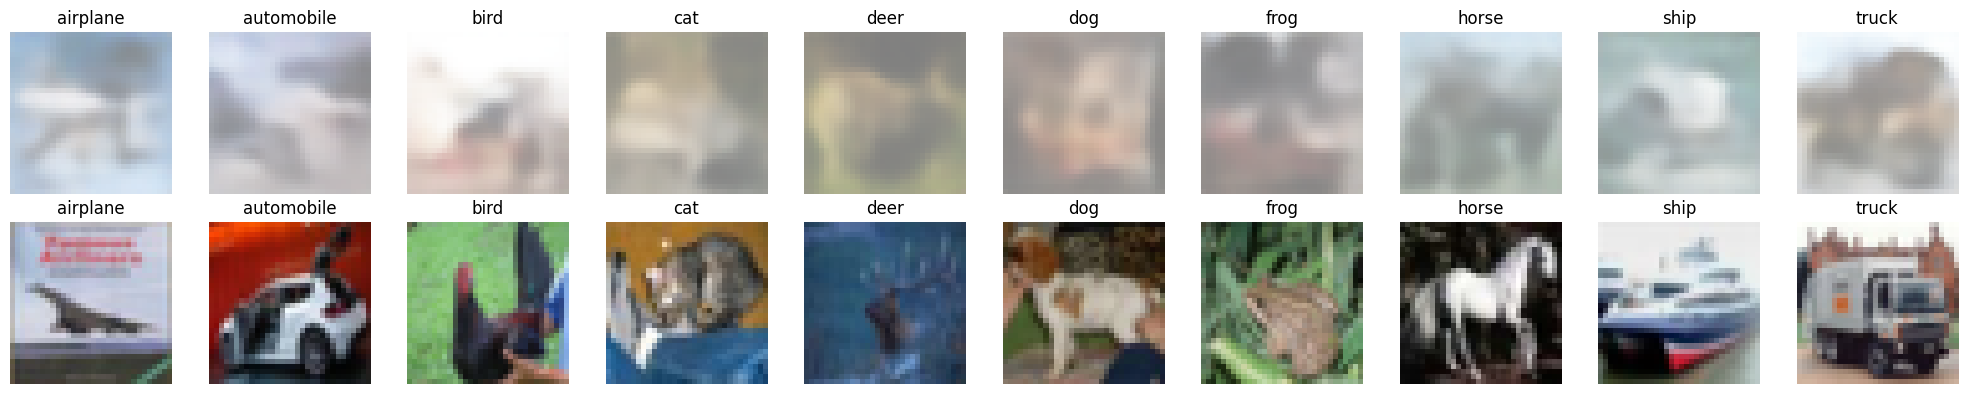

In [ ]:
import matplotlib.pyplot as plt

imgs_ds, lbls_ds = next(iter(train_ds))
lbls_ds = lbls_ds.numpy().argmax(1)
lbls_test = y_test.argmax(1)

selected_ds   = []
selected_test = []
for cls in range(10):
    idx_ds = (lbls_ds == cls).nonzero()[0][0]
    selected_ds.append(imgs_ds[idx_ds])
    idx_t  = (lbls_test == cls).nonzero()[0][0]
    selected_test.append(x_test[idx_t])

class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i, cls in enumerate(range(10)):
    axes[0,i].imshow(selected_ds[i])
    axes[0,i].set_title(class_names[cls])
    axes[0,i].axis('off')
    axes[1,i].imshow(selected_test[i])
    axes[1,i].set_title(class_names[cls])
    axes[1,i].axis('off')

plt.tight_layout()
plt.show()
